### PART 1 - DOWNLOAD NIFTY 50 DATA PAST 5+ YEARS

In [7]:
import yfinance as yf
import pandas as pd

# Step 1: Download 6 years of daily NIFTY 50 index data
nifty = yf.download("^NSEI", start="2018-01-01", interval="1d")

# Step 2: Reset index to make 'Date' a column
nifty.reset_index(inplace=True)

# Step 3: Keep only required columns
nifty = nifty[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

# Step 4: Clean volume data
nifty['Volume'] = nifty['Volume'].fillna(0).astype(int)

# Step 5: Sort by date
nifty = nifty.sort_values('Date')

# Step 6: Save cleaned file
nifty.to_csv("nifty50_cleaned.csv", index=False)

# Preview
nifty.tail()


C:\Users\Amit Kumar\AppData\Local\Temp\ipykernel_6104\3638096369.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty = yf.download("^NSEI", start="2018-01-01", interval="1d")
[*********************100%***********************]  1 of 1 completed


Price,Date,Open,High,Low,Close,Volume
Ticker,,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
1850,2025-07-08,25427.849609,25548.050781,25424.150391,25522.500000,210400
1851,2025-07-09,25514.599609,25548.699219,25424.349609,25476.099609,239100
1852,2025-07-10,25511.650391,25524.050781,25340.449219,25355.250000,219600
1853,2025-07-11,25255.500000,25322.449219,25129.000000,25149.849609,250000
1854,2025-07-14,25149.500000,25151.099609,25001.949219,25082.300781,0


In [8]:
import pandas as pd

# Load CSV with two header rows, and parse Date from index
df = pd.read_csv("nifty50_cleaned.csv", header=[0, 1], index_col=0)

# Drop the top-level (e.g. 'Price') in multi-level columns
df.columns = df.columns.droplevel(0)

# Reset index to move Date back into a column
df.reset_index(inplace=True)

# Rename columns
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

# Save cleaned version
df.to_csv("nifty50_cleaned.csv", index=False)

# Preview cleaned data
df.head()


,Date,Open,High,Low,Close,Volume
0,2018-01-02,10477.549805,10495.200195,10404.650391,10442.200195,153400
1,2018-01-03,10482.650391,10503.599609,10429.549805,10443.200195,167300
2,2018-01-04,10469.400391,10513.000000,10441.450195,10504.799805,174900
3,2018-01-05,10534.250000,10566.099609,10520.099609,10558.849609,180900
4,2018-01-08,10591.700195,10631.200195,10588.549805,10623.599609,169000


### PART 2 - CREATE A DATAFRAME OF A LOT OF MACRO AND FINANCIAL INDICATORS TOGETHER

In [9]:
import yfinance as yf
import pandas as pd

# -------------------------------------
# Define all symbols to download
# -------------------------------------
symbols = {
    'S&P500': '^GSPC',
    'NASDAQ': '^IXIC',
    'DOWJONES': '^DJI',
    'NIKKEI': '^N225',
    'HANGSENG': '^HSI',
    'USDINR': 'INR=X',
    'USDJPY': 'JPY=X',
    'USDCNY': 'CNY=X',
    'INDIAVIX': '^INDIAVIX',
    'VIX': '^VIX',
    'CRUDE': 'BZ=F',
    'GOLD': 'GC=F',
    'SILVER': 'SI=F',
    'NATGAS': 'NG=F',
    'COPPER': 'HG=F',
    'WHEAT': 'ZW=F',
    'UST10Y': '^TNX',
    'DOLLARINDEX': 'DX-Y.NYB'
}

start_date = "2018-01-01"
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# -------------------------------------
# Download all and extract 'Close' prices
# -------------------------------------
macro_data = []

for name, symbol in symbols.items():
    print(f"Downloading: {name} ({symbol})")
    df = yf.download(symbol, start=start_date, end=end_date)[['Close']].rename(columns={'Close': name})
    df.index = pd.to_datetime(df.index)
    macro_data.append(df)

# -------------------------------------
# Merge all dataframes on Date
# -------------------------------------
macro_df = pd.concat(macro_data, axis=1)

# Reset index and save
macro_df.reset_index(inplace=True)
macro_df.rename(columns={'index': 'Date'}, inplace=True)
macro_df.to_csv("macro_indicators_full.csv", index=False)

# Preview
macro_df.tail()


Downloading: S&P500 (^GSPC)


C:\Users\Amit Kumar\AppData\Local\Temp\ipykernel_6104\3290903688.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Close']].rename(columns={'Close': name})
[*********************100%***********************]  1 of 1 completed
C:\Users\Amit Kumar\AppData\Local\Temp\ipykernel_6104\3290903688.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Close']].rename(columns={'Close': name})


Downloading: NASDAQ (^IXIC)


[*********************100%***********************]  1 of 1 completed
C:\Users\Amit Kumar\AppData\Local\Temp\ipykernel_6104\3290903688.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Close']].rename(columns={'Close': name})


Downloading: DOWJONES (^DJI)


[*********************100%***********************]  1 of 1 completed
C:\Users\Amit Kumar\AppData\Local\Temp\ipykernel_6104\3290903688.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Close']].rename(columns={'Close': name})


Downloading: NIKKEI (^N225)


[*********************100%***********************]  1 of 1 completed
C:\Users\Amit Kumar\AppData\Local\Temp\ipykernel_6104\3290903688.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Close']].rename(columns={'Close': name})


Downloading: HANGSENG (^HSI)


[*********************100%***********************]  1 of 1 completed
C:\Users\Amit Kumar\AppData\Local\Temp\ipykernel_6104\3290903688.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Close']].rename(columns={'Close': name})


Downloading: USDINR (INR=X)


[*********************100%***********************]  1 of 1 completed
C:\Users\Amit Kumar\AppData\Local\Temp\ipykernel_6104\3290903688.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Close']].rename(columns={'Close': name})


Downloading: USDJPY (JPY=X)


[*********************100%***********************]  1 of 1 completed
C:\Users\Amit Kumar\AppData\Local\Temp\ipykernel_6104\3290903688.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Close']].rename(columns={'Close': name})


Downloading: USDCNY (CNY=X)


[*********************100%***********************]  1 of 1 completed
C:\Users\Amit Kumar\AppData\Local\Temp\ipykernel_6104\3290903688.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Close']].rename(columns={'Close': name})


Downloading: INDIAVIX (^INDIAVIX)


[*********************100%***********************]  1 of 1 completed
C:\Users\Amit Kumar\AppData\Local\Temp\ipykernel_6104\3290903688.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Close']].rename(columns={'Close': name})


Downloading: VIX (^VIX)


[*********************100%***********************]  1 of 1 completed
C:\Users\Amit Kumar\AppData\Local\Temp\ipykernel_6104\3290903688.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Close']].rename(columns={'Close': name})


Downloading: CRUDE (BZ=F)


[*********************100%***********************]  1 of 1 completed
C:\Users\Amit Kumar\AppData\Local\Temp\ipykernel_6104\3290903688.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Close']].rename(columns={'Close': name})


Downloading: GOLD (GC=F)


[*********************100%***********************]  1 of 1 completed
C:\Users\Amit Kumar\AppData\Local\Temp\ipykernel_6104\3290903688.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Close']].rename(columns={'Close': name})


Downloading: SILVER (SI=F)


[*********************100%***********************]  1 of 1 completed
C:\Users\Amit Kumar\AppData\Local\Temp\ipykernel_6104\3290903688.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Close']].rename(columns={'Close': name})


Downloading: NATGAS (NG=F)


[*********************100%***********************]  1 of 1 completed
C:\Users\Amit Kumar\AppData\Local\Temp\ipykernel_6104\3290903688.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Close']].rename(columns={'Close': name})


Downloading: COPPER (HG=F)


[*********************100%***********************]  1 of 1 completed
C:\Users\Amit Kumar\AppData\Local\Temp\ipykernel_6104\3290903688.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Close']].rename(columns={'Close': name})


Downloading: WHEAT (ZW=F)


[*********************100%***********************]  1 of 1 completed
C:\Users\Amit Kumar\AppData\Local\Temp\ipykernel_6104\3290903688.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Close']].rename(columns={'Close': name})


Downloading: UST10Y (^TNX)


[*********************100%***********************]  1 of 1 completed
C:\Users\Amit Kumar\AppData\Local\Temp\ipykernel_6104\3290903688.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Close']].rename(columns={'Close': name})


Downloading: DOLLARINDEX (DX-Y.NYB)


[*********************100%***********************]  1 of 1 completed


Price,Date,S&P500,NASDAQ,DOWJONES,NIKKEI,HANGSENG,USDINR,USDJPY,USDCNY,INDIAVIX,VIX,CRUDE,GOLD,SILVER,NATGAS,COPPER,WHEAT,UST10Y,DOLLARINDEX
Ticker,,^GSPC,^IXIC,^DJI,^N225,^HSI,INR=X,JPY=X,CNY=X,^INDIAVIX,^VIX,BZ=F,GC=F,SI=F,NG=F,HG=F,ZW=F,^TNX,DX-Y.NYB
1959,2025-07-07,6229.979980,20412.519531,44406.359375,39587.679688,23887.830078,85.496300,144.498001,7.1649,12.56,17.790001,69.580002,3332.199951,36.615002,3.412,4.9845,539.75,4.395,97.480003
1960,2025-07-08,6225.520020,20418.460938,44240.761719,39688.808594,24148.070312,85.891998,145.891998,7.1744,12.20,16.809999,70.150002,3307.000000,36.472000,3.340,5.6450,543.00,4.415,97.510002
1961,2025-07-09,6263.259766,20611.339844,44458.300781,39821.281250,23892.320312,85.707397,146.848999,7.1738,11.94,15.940000,70.190002,3311.600098,36.351002,3.214,5.4435,542.75,4.342,97.470001
1962,2025-07-10,6280.459961,20630.660156,44650.640625,39646.359375,24028.369141,85.708504,146.113998,7.1800,11.67,15.780000,68.639999,3317.399902,37.037998,3.337,5.5480,550.25,4.346,97.650002
1963,2025-07-11,6259.750000,20585.529297,44371.511719,39569.679688,24139.570312,85.734802,146.287994,7.1748,11.82,16.400000,70.360001,3356.000000,38.675999,3.314,5.5620,540.75,4.423,97.849998


In [11]:
import pandas as pd

# Load CSV with 2 header rows (Price and Ticker names)
df = pd.read_csv("macro_indicators_full.csv", header=[0, 1])

# Drop the top-level 'Price' header
df.columns = df.columns.droplevel(0)

# Rename columns
df.columns = ['Date'] + df.columns[1:].tolist()

# Reset index if Date is not a column
if 'Date' not in df.columns:
    df.reset_index(inplace=True)

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date
df = df.sort_values('Date')

# Save cleaned version
df.to_csv("macro_indicators_cleaned.csv", index=False)

# Preview
df.tail()


,Date,^GSPC,^IXIC,^DJI,^N225,^HSI,INR=X,JPY=X,CNY=X,^INDIAVIX,^VIX,BZ=F,GC=F,SI=F,NG=F,HG=F,ZW=F,^TNX,DX-Y.NYB
1959,2025-07-07,6229.979980,20412.519531,44406.359375,39587.679688,23887.830078,85.496300,144.498001,7.1649,12.56,17.790001,69.580002,3332.199951,36.615002,3.412,4.9845,539.75,4.395,97.480003
1960,2025-07-08,6225.520020,20418.460938,44240.761719,39688.808594,24148.070312,85.891998,145.891998,7.1744,12.20,16.809999,70.150002,3307.000000,36.472000,3.340,5.6450,543.00,4.415,97.510002
1961,2025-07-09,6263.259766,20611.339844,44458.300781,39821.281250,23892.320312,85.707397,146.848999,7.1738,11.94,15.940000,70.190002,3311.600098,36.351002,3.214,5.4435,542.75,4.342,97.470001
1962,2025-07-10,6280.459961,20630.660156,44650.640625,39646.359375,24028.369141,85.708504,146.113998,7.1800,11.67,15.780000,68.639999,3317.399902,37.037998,3.337,5.5480,550.25,4.346,97.650002
1963,2025-07-11,6259.750000,20585.529297,44371.511719,39569.679688,24139.570312,85.734802,146.287994,7.1748,11.82,16.400000,70.360001,3356.000000,38.675999,3.314,5.5620,540.75,4.423,97.849998


### PART 3 - Merge this clean macro data with NIFTY 50 index for supervised ML

In [14]:
import pandas as pd

# Step 1: Load both datasets
nifty = pd.read_csv("nifty50_cleaned.csv", parse_dates=['Date'])
macro = pd.read_csv("macro_indicators_cleaned.csv", parse_dates=['Date'])

# Step 2: Merge on 'Date'
merged_df = pd.merge(nifty, macro, on='Date', how='inner')

# Step 3: Handle missing values
merged_df.fillna(method='ffill', inplace=True)
merged_df.fillna(method='bfill', inplace=True)
merged_df.dropna(inplace=True)

# Step 4: Sort and save final cleaned dataset
merged_df = merged_df.sort_values('Date')
merged_df.to_csv("nifty50_merged_cleaned.csv", index=False)

# Step 5: Preview
print("Final shape:", merged_df.shape)
print("Any missing?", merged_df.isnull().sum().sum())
merged_df.tail()


Final shape: (1853, 24)
Any missing? 0


C:\Users\Amit Kumar\AppData\Local\Temp\ipykernel_6104\432132743.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)
C:\Users\Amit Kumar\AppData\Local\Temp\ipykernel_6104\432132743.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='bfill', inplace=True)


,Date,Open,High,Low,Close,Volume,^GSPC,^IXIC,^DJI,^N225,...,^INDIAVIX,^VIX,BZ=F,GC=F,SI=F,NG=F,HG=F,ZW=F,^TNX,DX-Y.NYB
1848,2025-07-07,25450.449219,25489.800781,25407.250000,25461.300781,196100,6229.979980,20412.519531,44406.359375,39587.679688,...,12.56,17.790001,69.580002,3332.199951,36.615002,3.412,4.9845,539.75,4.395,97.480003
1849,2025-07-08,25427.849609,25548.050781,25424.150391,25522.500000,210400,6225.520020,20418.460938,44240.761719,39688.808594,...,12.20,16.809999,70.150002,3307.000000,36.472000,3.340,5.6450,543.00,4.415,97.510002
1850,2025-07-09,25514.599609,25548.699219,25424.349609,25476.099609,239100,6263.259766,20611.339844,44458.300781,39821.281250,...,11.94,15.940000,70.190002,3311.600098,36.351002,3.214,5.4435,542.75,4.342,97.470001
1851,2025-07-10,25511.650391,25524.050781,25340.449219,25355.250000,219600,6280.459961,20630.660156,44650.640625,39646.359375,...,11.67,15.780000,68.639999,3317.399902,37.037998,3.337,5.5480,550.25,4.346,97.650002
1852,2025-07-11,25255.500000,25322.449219,25129.000000,25149.849609,250000,6259.750000,20585.529297,44371.511719,39569.679688,...,11.82,16.400000,70.360001,3356.000000,38.675999,3.314,5.5620,540.75,4.423,97.849998


### PART 4 - LABELLING 

In [20]:
import pandas as pd

# Load merged + cleaned dataset
df = pd.read_csv("nifty50_merged_cleaned.csv", parse_dates=['Date'])

# Define future offset (21 trading days ≈ 1 month)
future_days = 21

# Calculate future close and % change
df['Future_Close'] = df['Close'].shift(-future_days)
df['Pct_Change_1M'] = ((df['Future_Close'] - df['Close']) / df['Close']) * 100

# Label every row: Rise or Fall (binary)
df['Target_1M'] = df['Pct_Change_1M'].apply(lambda x: "Rise" if x >= 0 else "Fall")

# Drop rows with missing future close (only last 21 rows)
df.dropna(subset=['Future_Close'], inplace=True)

# Save fully labeled binary dataset
df.to_csv("nifty50_labeled_binary_full.csv", index=False)

# Quick check
print(df['Target_1M'].value_counts())
df[['Date', 'Close', 'Future_Close', 'Pct_Change_1M', 'Target_1M']].tail(5)


Target_1M
Rise    1153
Fall     679
Name: count, dtype: int64


,Date,Close,Future_Close,Pct_Change_1M,Target_1M
1827,2025-06-06,25003.050781,25461.300781,1.832776,Rise
1828,2025-06-09,25103.199219,25522.500000,1.670308,Rise
1829,2025-06-10,25104.250000,25476.099609,1.481222,Rise
1830,2025-06-11,25141.400391,25355.250000,0.850588,Rise
1831,2025-06-12,24888.199219,25149.849609,1.051303,Rise


### PART 5 - FEATURE ENGINEERING

In [23]:
import pandas as pd

# Load fully labeled dataset
df = pd.read_csv("nifty50_labeled_binary_full.csv", parse_dates=['Date'])

# Drop unnecessary columns
drop_cols = ['Future_Close', 'Pct_Change_1M']
df.drop(columns=drop_cols, inplace=True)

# Create rolling/lag/volatility features for all numeric columns (excluding Date and Target)
feature_cols = df.columns.difference(['Date', 'Target_1M'])

# Lag features
for col in feature_cols:
    df[f'{col}_lag1'] = df[col].shift(1)
    df[f'{col}_lag3'] = df[col].shift(3)
    df[f'{col}_lag5'] = df[col].shift(5)

# Rolling mean features
for col in feature_cols:
    df[f'{col}_roll3'] = df[col].rolling(3).mean()
    df[f'{col}_roll5'] = df[col].rolling(5).mean()
    df[f'{col}_roll10'] = df[col].rolling(10).mean()

# Volatility features
for col in feature_cols:
    df[f'{col}_vol5'] = df[col].rolling(5).std()
    df[f'{col}_vol10'] = df[col].rolling(10).std()

# Drop rows with NaNs caused by lag/rolling windows
df.dropna(inplace=True)

# Save final feature dataset
df.to_csv("nifty50_features_ready.csv", index=False)


C:\Users\Amit Kumar\AppData\Local\Temp\ipykernel_6104\1381582017.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_roll3'] = df[col].rolling(3).mean()
C:\Users\Amit Kumar\AppData\Local\Temp\ipykernel_6104\1381582017.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_roll5'] = df[col].rolling(5).mean()
C:\Users\Amit Kumar\AppData\Local\Temp\ipykernel_6104\1381582017.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor

In [25]:
# Preview new dataset to be sure
df.head(3)

,Date,Open,High,Low,Close,Volume,^GSPC,^IXIC,^DJI,^N225,...,^INDIAVIX_vol5,^INDIAVIX_vol10,^IXIC_vol5,^IXIC_vol10,^N225_vol5,^N225_vol10,^TNX_vol5,^TNX_vol10,^VIX_vol5,^VIX_vol10
9,2018-01-15,10718.500000,10782.650391,10713.799805,10741.549805,175900,2786.239990,7261.060059,25803.189453,23714.880859,...,0.219363,0.335785,51.372123,82.815358,76.310764,122.241787,0.008843,0.044639,0.160000,0.396507
10,2018-01-16,10761.500000,10762.349609,10687.849609,10700.450195,211000,2776.419922,7223.689941,25792.859375,23951.810547,...,0.207558,0.351056,44.275007,68.459465,115.412616,137.581096,0.008899,0.043715,0.756492,0.738016
11,2018-01-17,10702.450195,10803.000000,10666.750000,10788.549805,252700,2802.560059,7298.279785,26115.650391,23868.339844,...,0.221811,0.346160,34.357317,68.101281,124.824410,124.747055,0.017170,0.041266,0.952197,0.924338


### PART 6 - MODEL TRAINING


🔍 Logistic Regression - Classification Report:
              precision    recall  f1-score   support

        Fall       0.36      0.81      0.50       135
        Rise       0.56      0.14      0.22       230

    accuracy                           0.39       365
   macro avg       0.46      0.48      0.36       365
weighted avg       0.49      0.39      0.32       365



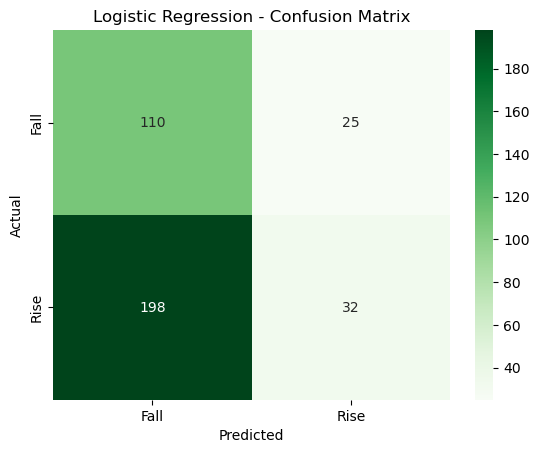

In [36]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("nifty50_features_ready.csv", parse_dates=['Date'])

df_model = df.drop(columns=['Date'])
df_model['Target_1M'] = df_model['Target_1M'].map({'Rise': 1, 'Fall': 0})

split_idx = int(len(df_model) * 0.8)
train_df = df_model.iloc[:split_idx]
test_df = df_model.iloc[split_idx:]

X_train = train_df.drop(columns=['Target_1M'])
y_train = train_df['Target_1M']
X_test = test_df.drop(columns=['Target_1M'])
y_test = test_df['Target_1M']

# Apply SMOTE to training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


# Train Logistic Regression
log_reg = LogisticRegression(
    class_weight='balanced',
    solver='liblinear',   # good for small/medium datasets
    max_iter=1000,
    random_state=42
)
log_reg.fit(X_train_balanced, y_train_balanced)

y_pred_log = log_reg.predict(X_test)

print("\n🔍 Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_log, target_names=["Fall", "Rise"]))

# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Greens', xticklabels=["Fall", "Rise"], yticklabels=["Fall", "Rise"])
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Before SMOTE: [500 879]
After SMOTE: [879 879]

🔍 Logistic Regression with Trend Indicators - Report:
              precision    recall  f1-score   support

        Fall       0.31      0.70      0.43       128
        Rise       0.36      0.10      0.15       217

    accuracy                           0.32       345
   macro avg       0.34      0.40      0.29       345
weighted avg       0.34      0.32      0.26       345



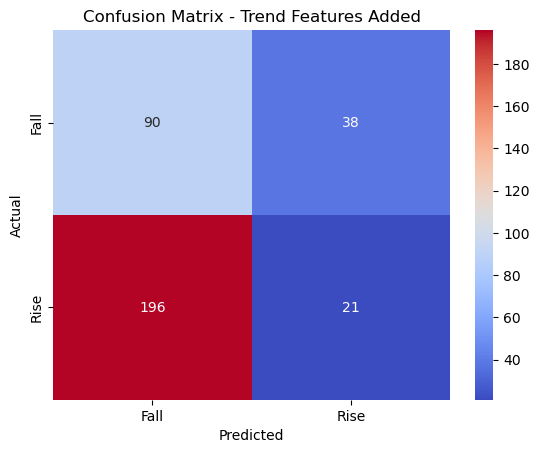

In [37]:
import pandas as pd
from ta.trend import MACD, ADXIndicator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np

# Step 1: Load dataset
df = pd.read_csv("nifty50_features_ready.csv", parse_dates=['Date'])

# Step 2: Add technical indicators based on NIFTY50 price
price_col = "Close" #Nifty 50 close price for indicators

# 100-DMA
df['MA_100'] = df[price_col].rolling(window=100).mean()
df['Price_above_MA100'] = (df[price_col] > df['MA_100']).astype(int)

# MACD
macd = MACD(close=df[price_col])
df['MACD'] = macd.macd()
df['MACD_signal'] = macd.macd_signal()

# ADX
adx = ADXIndicator(high=df['High'], low=df['Low'], close=df['Close'], window=14)
df['ADX'] = adx.adx()

# Daily return
df['Return_1D'] = df[price_col].pct_change()

# Drop NaNs from indicator calculation
df = df.dropna().reset_index(drop=True)

# Step 3: Prepare modeling dataframe
df_model = df.drop(columns=['Date'])
df_model['Target_1M'] = df_model['Target_1M'].map({'Rise': 1, 'Fall': 0})

# Step 4: Time-based split
split_idx = int(len(df_model) * 0.8)
train_df = df_model.iloc[:split_idx]
test_df = df_model.iloc[split_idx:]

X_train = train_df.drop(columns=['Target_1M'])
y_train = train_df['Target_1M']
X_test = test_df.drop(columns=['Target_1M'])
y_test = test_df['Target_1M']

# Step 5: SMOTE balancing on train set
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_bal))

# Step 6: Train Logistic Regression
log_reg = LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=1000, random_state=42)
log_reg.fit(X_train_bal, y_train_bal)

# Step 7: Evaluate
y_pred = log_reg.predict(X_test)

print("\n🔍 Logistic Regression with Trend Indicators - Report:")
print(classification_report(y_test, y_pred, target_names=["Fall", "Rise"]))

# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=["Fall", "Rise"], yticklabels=["Fall", "Rise"])
plt.title("Confusion Matrix - Trend Features Added")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


✅ Class counts after SMOTE: [920 920]


C:\Users\Amit Kumar\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:27:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔍 XGBoost - Classification Report:
              precision    recall  f1-score   support

        Fall       0.00      0.00      0.00       135
        Rise       0.63      1.00      0.77       230

    accuracy                           0.63       365
   macro avg       0.32      0.50      0.39       365
weighted avg       0.40      0.63      0.49       365



C:\Users\Amit Kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Amit Kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Amit Kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


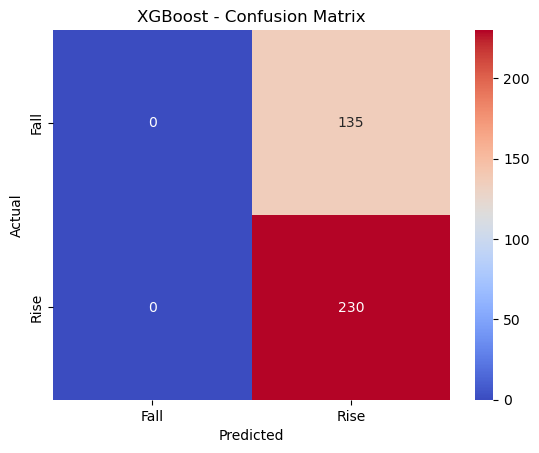

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Step 1: Load enhanced dataset
df = pd.read_csv("nifty50_features_ready.csv", parse_dates=['Date'])

# Step 2: Drop rows with missing values (after technical indicators)
df = df.dropna().reset_index(drop=True)

# Step 3: Prepare modeling dataframe
df_model = df.drop(columns=['Date'])  # No Date in features
df_model['Target_1M'] = df_model['Target_1M'].map({'Rise': 1, 'Fall': 0})

# Step 4: Time-based split
split_idx = int(len(df_model) * 0.8)
train_df = df_model.iloc[:split_idx]
test_df = df_model.iloc[split_idx:]

X_train = train_df.drop(columns=['Target_1M'])
y_train = train_df['Target_1M']
X_test = test_df.drop(columns=['Target_1M'])
y_test = test_df['Target_1M']

# Step 5: SMOTE for class balance
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("✅ Class counts after SMOTE:", np.bincount(y_train_bal))

# Step 6: Train XGBoost
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train_bal, y_train_bal)

# Step 7: Predict
y_pred = xgb.predict(X_test)

# Step 8: Evaluate
print("\n🔍 XGBoost - Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Fall", "Rise"]))

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=["Fall", "Rise"], yticklabels=["Fall", "Rise"])
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
